# Desafio Titanic - Kaggle

In [275]:
# Importando todos os pacotes e bibiotecas necessárias!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn import preprocessing

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Análise e Tratamento dos dados do dataframe de treino primeiro!


In [276]:
# Lendo o dataframe de treino!
train = pd.read_csv("C:/Users/Ivan/train.csv")

In [277]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


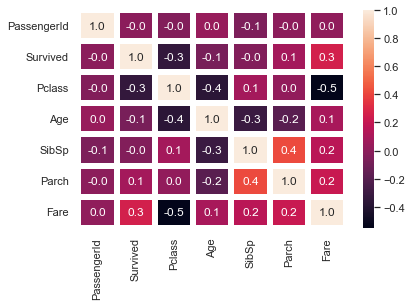

In [278]:
# Analisando a correlação entre variáveis!
correlation = train.corr()
heatmap = sns.heatmap(correlation, annot=True, fmt='.1f', linecolor='white', linewidths=6)

In [279]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [280]:
# Primeiro tratamento de dados, como a coluna Embarked continha apenas dois valores nulos, optei por preencher com a moda!
train['Embarked'].fillna("S", inplace=True)

In [281]:
train['Embarked'].isnull().sum()

0

In [282]:
# Aredito que não precisaremos desta coluna para nosso modelo, ela nem aparece na correlação!
train = train.drop("Cabin", axis = 1)

In [283]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [284]:
# Separando os sobrenomes do restante dos nomes!
train['Title'] = train['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [285]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [286]:
# Vamos manter somente os top4 com mais sobrenomes e tratar todos os demais como Person!
train['Title'] = [n if n in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Person' for n in train['Title']]

In [287]:
#train['Title'].nunique()
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Person'], dtype=object)

In [288]:
# Convertendo os dados do Title de objeto para inteiro!
le = preprocessing.LabelEncoder()
train['Title'] = le.fit_transform(train['Title'])

In [289]:
train['Title'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Title
Non-Null Count  Dtype
--------------  -----
891 non-null    int32
dtypes: int32(1)
memory usage: 3.6 KB


In [290]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,2


In [291]:
# Excluindo a coluna Name, também acretido que não precisaremos mais!
train = train.drop('Name', axis = 1)

In [292]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,male,35.0,0,0,373450,8.0500,S,2


In [293]:
# Convertendo a variável categórica Sex para inteiro!
train['Sex'] = le.fit_transform(train['Sex'])

In [294]:
train['Sex'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Sex
Non-Null Count  Dtype
--------------  -----
891 non-null    int32
dtypes: int32(1)
memory usage: 3.6 KB


In [295]:
train['Age'].isnull().sum()

177

In [296]:
# Verificando se tem alguma criança com valor nulo!
train[train['Title'] == 0]['Age']

7       2.00
16      2.00
50      7.00
59     11.00
63      4.00
65       NaN
78      0.83
125    12.00
159      NaN
164     1.00
165     9.00
171     4.00
176      NaN
182     9.00
183     1.00
193     3.00
261     3.00
278     7.00
305     0.92
340     2.00
348     3.00
386     1.00
407     3.00
445     4.00
480     9.00
489     9.00
549     8.00
709      NaN
751     6.00
755     0.67
787     8.00
788     1.00
802    11.00
803     0.42
819    10.00
824     2.00
827     1.00
831     0.83
850     4.00
869     4.00
Name: Age, dtype: float64

In [297]:
train[train['Title'] == 0]['Age'].isnull().sum()

4

In [298]:
# Preenchendo os valores nulos das idades das crianças com a média!
for i in train.index:
    
    if pd.isnull(train['Age'][i]):
        
        if train['Title'][i] == 0:
            train['Age'][i] = round(train[train['Title'] == 0]['Age'].mean())
    else:
        continue

C:\Users\Ivan\AppData\Local\Temp\ipykernel_548\2816582873.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = round(train[train['Title'] == 0]['Age'].mean())


In [299]:
train[train['Title'] == 0]['Age'].isnull().sum()

0

In [300]:
train['Age'].isnull().sum()

173

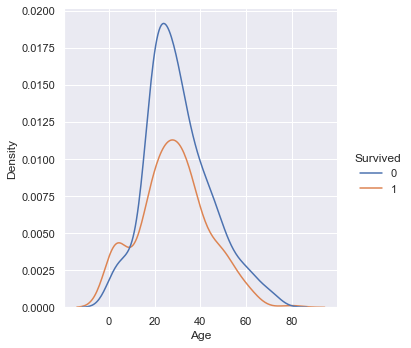

In [301]:
sns.displot(data = train, x = 'Age', hue = 'Survived', kind='kde')

In [302]:
train['Age'].describe()

count    718.000000
mean      29.561518
std       14.602269
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [303]:
train.loc[:, ['Age','Survived']].value_counts()

Age   Survived
21.0  0           19
28.0  0           18
25.0  0           17
18.0  0           17
19.0  0           16
                  ..
36.5  0            1
37.0  1            1
43.0  1            1
47.0  1            1
80.0  1            1
Length: 143, dtype: int64

In [304]:
# Preenchendo o resto dos valores nulos das idades com a média, pois a maioria das pessoas que morreram tinham entre 18 e 28 anos!
for i in train.index:
    
    if pd.isnull(train['Age'][i]):
            train['Age'][i] = round(train['Age'].mode())
    else:
        continue

C:\Users\Ivan\AppData\Local\Temp\ipykernel_548\3508461302.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = round(train['Age'].mode())
C:\Users\Ivan\AppData\Local\Temp\ipykernel_548\3508461302.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = round(train['Age'].mode())
C:\Users\Ivan\AppData\Local\Temp\ipykernel_548\3508461302.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i] = r

In [305]:
train['Age'].isnull().sum()

0

In [306]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,S,3
4,5,0,3,1,35.0,0,0,373450,8.0500,S,2


In [307]:
# Convertendo coluna Age (Idade) de flutuante para inteiro!
train['Age'] = train['Age'].astype(int)

In [308]:
train['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype
--------------  -----
891 non-null    int32
dtypes: int32(1)
memory usage: 3.6 KB


In [309]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,1,22,1,0,A/5 21171,7.2500,S,2
1,2,1,1,0,38,1,0,PC 17599,71.2833,C,3
2,3,1,3,0,26,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,0,35,1,0,113803,53.1000,S,3
4,5,0,3,1,35,0,0,373450,8.0500,S,2


In [310]:
# Excluir coluna Ticket, não aparece na correlação e pra mim não faz sentido para nosso modelo!
train = train.drop('Ticket', axis = 1)

In [311]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,22,1,0,7.2500,S,2
1,2,1,1,0,38,1,0,71.2833,C,3
2,3,1,3,0,26,0,0,7.9250,S,1
3,4,1,1,0,35,1,0,53.1000,S,3
4,5,0,3,1,35,0,0,8.0500,S,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0,0,13.0000,S,4
887,888,1,1,0,19,0,0,30.0000,S,1
888,889,0,3,0,24,1,2,23.4500,S,1
889,890,1,1,1,26,0,0,30.0000,C,2


In [312]:
# Convertendo a coluna Fare para inteiro!
train['Fare'] = train['Fare'].astype(int)

In [313]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,22,1,0,7,S,2
1,2,1,1,0,38,1,0,71,C,3
2,3,1,3,0,26,0,0,7,S,1
3,4,1,1,0,35,1,0,53,S,3
4,5,0,3,1,35,0,0,8,S,2


In [314]:
# Convertendo a coluna Embarked em inteiro!
train['Embarked'] = le.fit_transform(train['Embarked'])

In [315]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,22,1,0,7,2,2
1,2,1,1,0,38,1,0,71,0,3
2,3,1,3,0,26,0,0,7,2,1
3,4,1,1,0,35,1,0,53,2,3
4,5,0,3,1,35,0,0,8,2,2


In [316]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int32
 4   Age          891 non-null    int32
 5   SibSp        891 non-null    int64
 6   Parch        891 non-null    int64
 7   Fare         891 non-null    int32
 8   Embarked     891 non-null    int32
 9   Title        891 non-null    int32
dtypes: int32(5), int64(5)
memory usage: 52.3 KB


# Modelo Pronto - Treinar o modelo com os algoritimos de ML!

In [317]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [318]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,3,1,22,1,0,7,2,2
1,2,1,0,38,1,0,71,0,3
2,3,3,0,26,0,0,7,2,1
3,4,1,0,35,1,0,53,2,3
4,5,3,1,35,0,0,8,2,2
...,...,...,...,...,...,...,...,...,...
886,887,2,1,27,0,0,13,2,4
887,888,1,0,19,0,0,30,2,1
888,889,3,0,24,1,2,23,2,1
889,890,1,1,26,0,0,30,0,2


In [319]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [320]:
algoritimos = ['RandomForestClassifier', 
               'LogisticRegression', 
               'KNeighborsClassifier', 
               'GaussianNB', 
               'LinearSVC',
               'SGDClassifier', 
               'DecisionTreeClassifier',
              'GradientBoostingClassifier']
alg_df = pd.DataFrame(algoritimos, columns=['Nome Algoritimos'])
alg_df

,Nome Algoritimos
0,RandomForestClassifier
1,LogisticRegression
2,KNeighborsClassifier
3,GaussianNB
4,LinearSVC
5,SGDClassifier
6,DecisionTreeClassifier
7,GradientBoostingClassifier


In [321]:
alg_df['Pontuação'] = ''

In [322]:
alg_df

,Nome Algoritimos,Pontuação
0,RandomForestClassifier,
1,LogisticRegression,
2,KNeighborsClassifier,
3,GaussianNB,
4,LinearSVC,
5,SGDClassifier,
6,DecisionTreeClassifier,
7,GradientBoostingClassifier,


In [323]:
# Função para testar todos os algoritimos de Machine Learning
def func_acuracia(algoritmo, X_train, y_train, vc):
    modelo = algoritmo.fit(X_train, y_train)
    acuracia = round(modelo.score(X_train, y_train) * 100, 2)
    
    train_pred = model_selection.cross_val_predict(algoritmo, X_train, y_train, cv = vc, n_jobs = -1)
    acuracia_vc = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return acuracia, acuracia_vc

In [324]:
# Random Forest

acc_rf, acc_vc_rf = func_acuracia(RandomForestClassifier(), X, y, 40)

print(f"Acurácia: {acc_rf}")
print(f"Acurácia Validação Cruzada: {acc_vc_rf}")

Acurácia: 100.0
Acurácia Validação Cruzada: 82.04


In [325]:
# Preenchendo a pontuação de cada modelo de algoritimo!
alg_df.loc[0, 'Pontuação'] = acc_vc_rf
alg_df

,Nome Algoritimos,Pontuação
0,RandomForestClassifier,82.04
1,LogisticRegression,
2,KNeighborsClassifier,
3,GaussianNB,
4,LinearSVC,
5,SGDClassifier,
6,DecisionTreeClassifier,
7,GradientBoostingClassifier,


In [326]:
# Logistic Regression
acc_log, acc_vc_log = func_acuracia(LogisticRegression(max_iter = 1000), X, y, 40)

print(f"Acurácia: {acc_log}")
print(f"Acurácia Validação Cruzada: {acc_vc_log}")

Acurácia: 80.02
Acurácia Validação Cruzada: 79.69


In [327]:
# Preenchendo a pontuação de cada modelo de algoritimo!
alg_df.loc[1, 'Pontuação'] = acc_vc_log
alg_df

,Nome Algoritimos,Pontuação
0,RandomForestClassifier,82.04
1,LogisticRegression,79.69
2,KNeighborsClassifier,
3,GaussianNB,
4,LinearSVC,
5,SGDClassifier,
6,DecisionTreeClassifier,
7,GradientBoostingClassifier,


In [328]:
# K-Nearest Neighbours

acc_knn, acc_vc_knn = func_acuracia(KNeighborsClassifier(), X, y, 10)

print(f"Acurácia: {acc_knn}")
print(f"Acurácia Validação Cruzada: {acc_vc_knn}")

Acurácia: 75.76
Acurácia Validação Cruzada: 50.51


In [329]:
# Preenchendo a pontuação de cada modelo de algoritimo!
alg_df.loc[2, 'Pontuação'] = acc_vc_knn
alg_df

,Nome Algoritimos,Pontuação
0,RandomForestClassifier,82.04
1,LogisticRegression,79.69
2,KNeighborsClassifier,50.51
3,GaussianNB,
4,LinearSVC,
5,SGDClassifier,
6,DecisionTreeClassifier,
7,GradientBoostingClassifier,


In [330]:
# Gaussian Naive Bayes

acc_gaussian, acc_vc_gaussian = func_acuracia(GaussianNB(), X, y, 40)

print(f"Acurácia: {acc_gaussian}")
print(f"Acurácia Validação Cruzada: {acc_vc_gaussian}")

Acurácia: 79.57
Acurácia Validação Cruzada: 78.9


In [331]:
# Preenchendo a pontuação de cada modelo de algoritimo!
alg_df.loc[3, 'Pontuação'] = acc_vc_gaussian
alg_df

,Nome Algoritimos,Pontuação
0,RandomForestClassifier,82.04
1,LogisticRegression,79.69
2,KNeighborsClassifier,50.51
3,GaussianNB,78.9
4,LinearSVC,
5,SGDClassifier,
6,DecisionTreeClassifier,
7,GradientBoostingClassifier,


In [332]:
# Linear Support Vector Machines (SVC)

acc_linear_svc, acc_vc_linear_svc = func_acuracia(LinearSVC(dual = False), X, y, 40)

print(f"Acurácia: {acc_linear_svc}")
print(f"Acurácia Validação Cruzada: {acc_vc_linear_svc}")

Acurácia: 80.13
Acurácia Validação Cruzada: 79.69


In [333]:
# Preenchendo a pontuação de cada modelo de algoritimo!
alg_df.loc[4, 'Pontuação'] = acc_vc_linear_svc
alg_df

,Nome Algoritimos,Pontuação
0,RandomForestClassifier,82.04
1,LogisticRegression,79.69
2,KNeighborsClassifier,50.51
3,GaussianNB,78.9
4,LinearSVC,79.69
5,SGDClassifier,
6,DecisionTreeClassifier,
7,GradientBoostingClassifier,


In [334]:
# Stochastic Gradient Descent

acc_sgd, acc_vc_sgd = func_acuracia(SGDClassifier(), X, y, 40)

print(f"Acurácia: {acc_sgd}")
print(f"Acurácia Validação Cruzada: {acc_vc_sgd}")

Acurácia: 64.87
Acurácia Validação Cruzada: 56.0


In [335]:
# Preenchendo a pontuação de cada modelo de algoritimo!
alg_df.loc[5, 'Pontuação'] = acc_vc_sgd
alg_df

,Nome Algoritimos,Pontuação
0,RandomForestClassifier,82.04
1,LogisticRegression,79.69
2,KNeighborsClassifier,50.51
3,GaussianNB,78.9
4,LinearSVC,79.69
5,SGDClassifier,56.0
6,DecisionTreeClassifier,
7,GradientBoostingClassifier,


In [336]:
# Decision Tree Classifiers

acc_dt, acc_vc_dt = func_acuracia(DecisionTreeClassifier(), X, y, 40)

print(f"Acurácia: {acc_dt}")
print(f"Acurácia Validação Cruzada: {acc_vc_dt}")

Acurácia: 100.0
Acurácia Validação Cruzada: 75.08


In [337]:
# Preenchendo a pontuação de cada modelo de algoritimo!
alg_df.loc[6, 'Pontuação'] = acc_vc_dt
alg_df

,Nome Algoritimos,Pontuação
0,RandomForestClassifier,82.04
1,LogisticRegression,79.69
2,KNeighborsClassifier,50.51
3,GaussianNB,78.9
4,LinearSVC,79.69
5,SGDClassifier,56.0
6,DecisionTreeClassifier,75.08
7,GradientBoostingClassifier,


In [338]:
# Gradient Boost Classifier

acc_gbt, acc_vc_gbt = func_acuracia(GradientBoostingClassifier(), X, y, 40)

print(f"Acurácia: {acc_gbt}")
print(f"Acurácia Validação Cruzada: {acc_vc_gbt}")

Acurácia: 90.46
Acurácia Validação Cruzada: 78.9


In [339]:
# Preenchendo a pontuação de cada modelo de algoritimo!
alg_df.loc[7, 'Pontuação'] = acc_vc_gbt
alg_df

,Nome Algoritimos,Pontuação
0,RandomForestClassifier,82.04
1,LogisticRegression,79.69
2,KNeighborsClassifier,50.51
3,GaussianNB,78.9
4,LinearSVC,79.69
5,SGDClassifier,56.0
6,DecisionTreeClassifier,75.08
7,GradientBoostingClassifier,78.9


In [340]:
# Ordenando o dataframe pelo algoritimo maior pontuado!
alg_df = alg_df.sort_values('Pontuação', ascending=False)

In [341]:
alg_df

,Nome Algoritimos,Pontuação
0,RandomForestClassifier,82.04
1,LogisticRegression,79.69
4,LinearSVC,79.69
3,GaussianNB,78.9
7,GradientBoostingClassifier,78.9
6,DecisionTreeClassifier,75.08
5,SGDClassifier,56.0
2,KNeighborsClassifier,50.51


In [342]:
alg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 2
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nome Algoritimos  8 non-null      object
 1   Pontuação         8 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


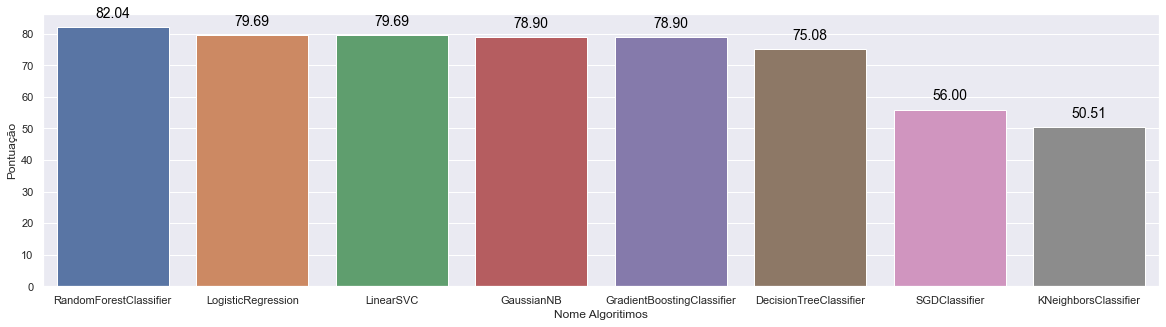

In [343]:
fig, ax = plt.subplots(figsize=(20, 5))
ax1 = sns.barplot(data=alg_df, x='Nome Algoritimos', y='Pontuação', ax = ax)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
    height + 3,
    '{:1.2f}'.format((height)),
    ha='center',
    fontsize = 14,
    color = 'black')
plt.show()


# Percebemos que o algoritimo que melhor performou foi o Randon Forest, logo vamos utilizar ele para treinar nossa base de dados!

In [344]:
params = dict(
    max_depth = [n for n in range(1, 5)],
    min_samples_split = [n for n in range(2, 6)],
    min_samples_leaf = [n for n in range(2, 6)],
    n_estimators = [n for n in range(10, 50, 10)]
)

In [345]:
rf = RandomForestClassifier()

In [346]:
param_space = {"bootstrap": [True],
        "max_depth": [6, 8, 10, 12, 14],
        "max_features": ['auto', 'sqrt','log2'],
        "min_samples_leaf": [2, 3, 4],
        "min_samples_split": [2, 3, 4, 5],
        "n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

rf_vc = RandomizedSearchCV(rf, param_space, n_iter=32,
                                        scoring="accuracy", verbose=True, cv=5,
                                        n_jobs=-1, random_state=42)

In [ ]:
rf_vc.fit(X, y)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [ ]:
print(f"Melhor pontuação: {rf_vc.best_score_}")
print(f"Melhores Parâmetros: {rf_vc.best_estimator_}")

# Analisar e preperar os dados de teste!


In [ ]:
test = pd.read_csv("C:/Users/Ivan/test.csv")

In [ ]:
passengerId = test['PassengerId']

In [ ]:
test

In [ ]:
test.info()

# Seguir mais ou menos a mesma lógica dos dados de treino!


In [ ]:
test['Title'] = test['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [ ]:
test['Title'] = [n if n in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Person' for n in test['Title']]

In [ ]:
test['Title'] = le.fit_transform(test['Title'])

In [ ]:
test['Title'].unique()

In [ ]:
test = test.drop('Name', axis = 1)

In [ ]:
test.head()

In [ ]:
test['Sex'] = le.fit_transform(test['Sex'])

In [ ]:
test.head()

In [ ]:
test['Age'].isnull().sum()

In [ ]:
# Crianças
test[test['Title'] == 0]['Age'].isnull().sum()

In [ ]:
# Preenchendo os valores nulos das idades das crianças com a média!
for i in test.index:
    
    if pd.isnull(test['Age'][i]):
        
        if test['Title'][i] == 0:
            test['Age'][i] = round(test[test['Title'] == 0]['Age'].mean())
    else:
        continue

In [ ]:
test[test['Title'] == 0]['Age'].isnull().sum()

In [ ]:
test['Age'].isnull().sum()

In [ ]:
# Analisando a correlação entre variáveis!
correlation = test.corr()
heatmap = sns.heatmap(correlation, annot=True, fmt='.1f', linecolor='white', linewidths=6)

In [ ]:
# Analisando o gráfico acima, idade e título têem forte correlação!
test.loc[:, ['Age','Title']].value_counts()

In [ ]:
# Como as top3 idades com o título de Mr ficam entre 21 e 25, optei por preencher os valores com 24! 
for i in test.index:
    
    if pd.isnull(test['Age'][i]):
            test['Age'][i] = 24
    else:
        continue

In [ ]:
test['Age'].isnull().sum()

In [ ]:
test['Age']

In [ ]:
test.head()

In [ ]:
# Convertendo a coluna de idade para inteiro!
test['Age'] = test['Age'].astype(int)

In [ ]:
test.head()

In [ ]:
# A exemplo do dataframe de treino, vamos excluir as colunas de Ticket e Cabin pois não vamos usar elas!
test = test.drop(['Ticket', 'Cabin'], axis = 1)

In [ ]:
test.head()

In [ ]:
test.info()


In [ ]:
test['Fare'].mode()

In [ ]:
test['Fare'].fillna(7.75, inplace = True)

In [ ]:
test['Fare'].isnull().sum()

In [ ]:
test['Fare'] = test['Fare'].astype(int)

In [ ]:
test['Fare'].info()

In [ ]:
test['Embarked'] = le.fit_transform(test['Embarked'])

In [ ]:
test.info()

# Modelo de previsão pronto, agora vamos submeter ao Kaggle!

In [ ]:
# Prevendo o modelo e salvando no formato para enviar ao Kaggle!
rf_pred = rf_vc.predict(test)
kaggle = pd.DataFrame({'PassengerId': passengerId, 'Survived': rf_pred})

kaggle.to_csv('Titanic_rf.csv', index = False)

In [ ]:
kaggle